<a href="https://colab.research.google.com/github/Samarth2624/ShadowFox/blob/main/Delhi_AQI_Colab_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delhi AQI (Air Quality Index) Analysis Notebook

This notebook performs an in-depth analysis of the Air Quality Index (AQI) in Delhi using a dataset (`delhiaqi.csv`).

It includes:
- Data loading and cleaning
- Seasonal AQI trends
- Correlation analysis between pollutants
- Visualizations
- Recommendations for air quality improvement

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid')

In [10]:
# Upload your delhiaqi.csv file first (click folder icon > upload)
df = pd.read_csv('/delhiaqi.csv')
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


,0
date,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


In [12]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df['Month'] = df['Date'].dt.month
    df['Season'] = df['Month'].apply(
        lambda x: 'Winter' if x in [12, 1, 2] else
                  'Summer' if x in [3, 4, 5] else
                  'Monsoon' if x in [6, 7, 8, 9] else 'Post-Monsoon'
    )
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [13]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


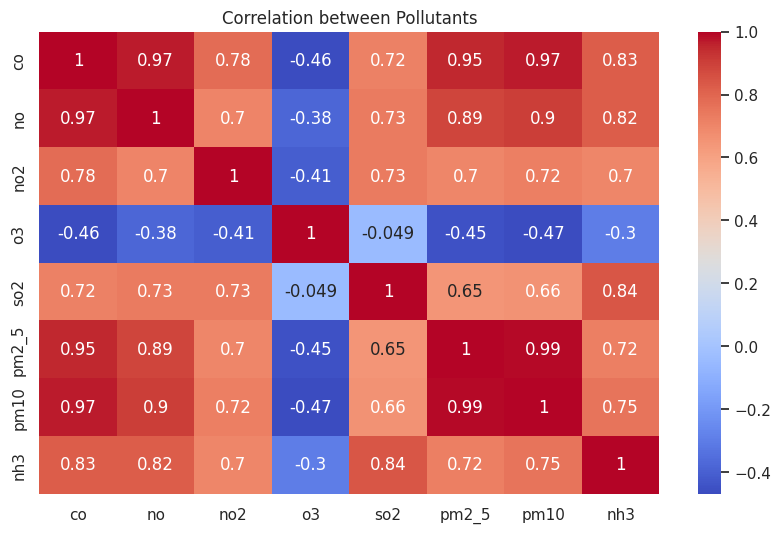

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between Pollutants')
plt.show()

In [15]:
if 'AQI' in df.columns:
    seasonal_avg = df.groupby('Season')['AQI'].mean().reset_index()
    plt.figure(figsize=(8,5))
    sns.barplot(data=seasonal_avg, x='Season', y='AQI', palette='viridis')
    plt.title('Average AQI by Season in Delhi')
    plt.ylabel('AQI')
    plt.show()

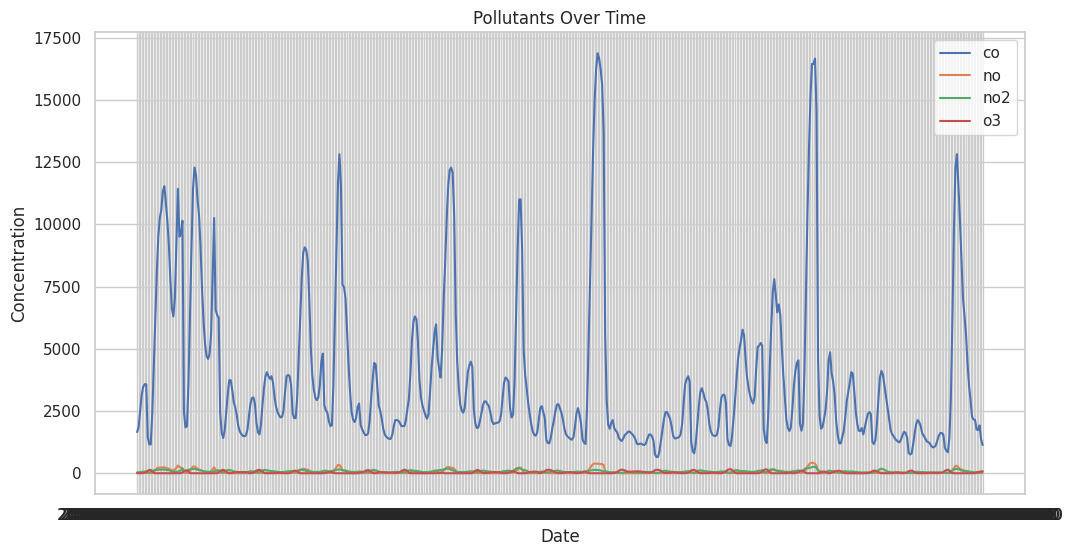

In [19]:
pollutants = [col for col in df.columns if col not in ['date','Month','Season','AQI']]
plt.figure(figsize=(12,6))
for col in pollutants[:4]:
    plt.plot(df['date'], df[col], label=col)
plt.title('Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

## 🔍 Insights & Recommendations

- **Winter & Post-Monsoon** show worst AQI due to stubble burning, calm winds, and temperature inversion.
- **PM2.5 and PM10** are highly correlated with **NO₂** and **CO** — strong indicators of vehicular and industrial pollution.
- **Monsoon months** improve AQI due to rain and higher wind dispersion.
- **Recommendations**:
  - Implement stricter seasonal vehicle/emission control
  - Address crop burning with alternatives
  - Monitor and regulate ozone levels (O₃) more aggressively
  - Promote urban afforestation and public transport